In [11]:
!python -m spacy download el_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 7.0 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [12]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)
nlp = spacy.load('el_core_news_sm')

In [14]:
tweets_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/xafnikitida_tweets.tsv", sep='\t')
small_tweets = tweets_df[['created_at','text' ]]
small_tweets_renamed = small_tweets.rename(columns={'created_at': 'date'})
small_tweets_renamed['date'] = pd.to_datetime(small_tweets_renamed['date'], format='%a %b %d %H:%M:%S +0000 %Y')
small_tweets_renamed['text'] = small_tweets_renamed['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")
small_tweets_renamed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,date,text
0,2022-06-29 17:43:21,RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\...
1,2022-06-29 17:37:16,RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη ...
2,2022-06-29 17:12:08,RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\...
3,2022-06-29 17:11:20,RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\...
4,2022-06-29 16:58:46,RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη ...
...,...,...
2875,2022-06-20 11:26:18,RT @Kalhas821: Η Παγώνη μόλις δήλωσε στον #σκα...
2876,2022-06-20 11:25:44,Η Παγώνη μόλις δήλωσε στον #σκαι_ξεφτιλες Ότι ...
2877,2022-06-20 11:23:43,Μετά από 2μιση χρόνια κορωνοιου δεν υπάρχει κα...
2878,2022-06-20 11:19:45,RT @panos__pao: Όταν η επιστήμη έχει φτάσει σε...


In [15]:
countVec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, strip_accents = 'unicode', stop_words= nlp.Defaults.stop_words, ngram_range=(1, 2))
matrix = countVec.fit_transform(small_tweets_renamed['text'])
vocab = countVec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
emolex_df.head()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
emolex_df[emolex_df.Anger == 1].tail()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,13104,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,13106,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,13110,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,13138,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [18]:
angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']

fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [19]:
small_tweets_renamed['anger'] = wordcount_df[angry_words].sum(axis=1)

small_tweets_renamed['positivity'] = wordcount_df[positive_words].sum(axis=1)

small_tweets_renamed['joy'] = wordcount_df[joy_words].sum(axis=1)

small_tweets_renamed['disgust'] = wordcount_df[disgust_words].sum(axis=1)

small_tweets_renamed['surprise'] = wordcount_df[surprise_words].sum(axis=1)

small_tweets_renamed['trust'] = wordcount_df[trust_words].sum(axis=1)

small_tweets_renamed['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

small_tweets_renamed['sadness'] = wordcount_df[sadness_words].sum(axis=1)

small_tweets_renamed['negative'] = wordcount_df[negative_words].sum(axis=1)

small_tweets_renamed['fear'] = wordcount_df[fear_words].sum(axis=1)

In [20]:
small_tweets_renamed

,date,text,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2022-06-29 17:43:21,RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\...,0,0,0,0,0,0,0,0,0,0
1,2022-06-29 17:37:16,RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη ...,1,2,1,2,1,0,0,0,2,1
2,2022-06-29 17:12:08,RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\...,0,0,0,0,0,0,0,0,0,0
3,2022-06-29 17:11:20,RT @PanagiotisMylo6: Προσωπικές εμπειρίες..!!\...,0,0,0,0,0,0,0,0,0,0
4,2022-06-29 16:58:46,RT @dstefanos: Τον πήραν στο ψιλό τον #Πλεύρη ...,1,2,1,2,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2022-06-20 11:26:18,RT @Kalhas821: Η Παγώνη μόλις δήλωσε στον #σκα...,0,1,1,1,1,2,1,1,1,0
2876,2022-06-20 11:25:44,Η Παγώνη μόλις δήλωσε στον #σκαι_ξεφτιλες Ότι ...,0,1,1,1,1,2,1,1,1,0
2877,2022-06-20 11:23:43,Μετά από 2μιση χρόνια κορωνοιου δεν υπάρχει κα...,0,1,1,0,1,0,0,0,1,0
2878,2022-06-20 11:19:45,RT @panos__pao: Όταν η επιστήμη έχει φτάσει σε...,1,0,0,2,0,0,1,0,1,0


In [25]:
small_tweets_renamed.set_index('date' , inplace=True)

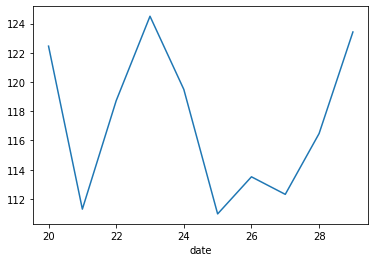

In [26]:
small_tweets_renamed['text'].str.len().groupby(by=small_tweets_renamed.index.day).mean().plot() 

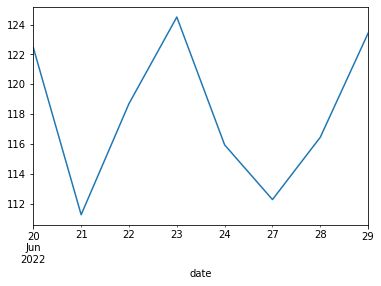

In [27]:
small_tweets_renamed['text'].str.len().resample('C').mean().plot() 

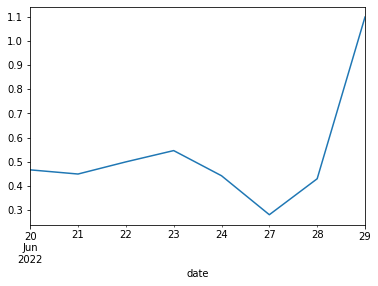

In [28]:
small_tweets_renamed['positivity'].resample('C').mean().plot() 

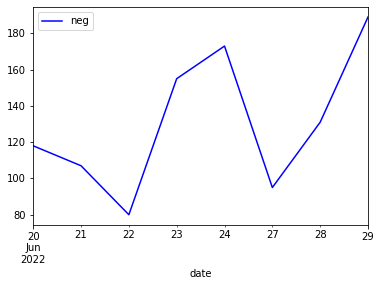

In [29]:
small_tweets_renamed['negative'].resample('C').sum().plot(color = 'b',label = 'neg').legend() 

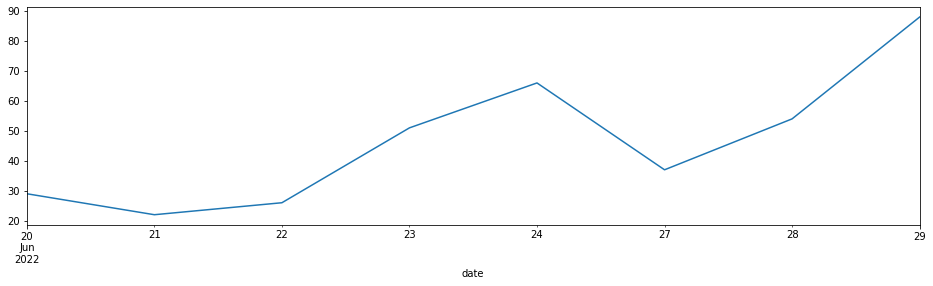

In [30]:
small_tweets_renamed['anger'].resample('C').sum().plot(figsize=(16,4))

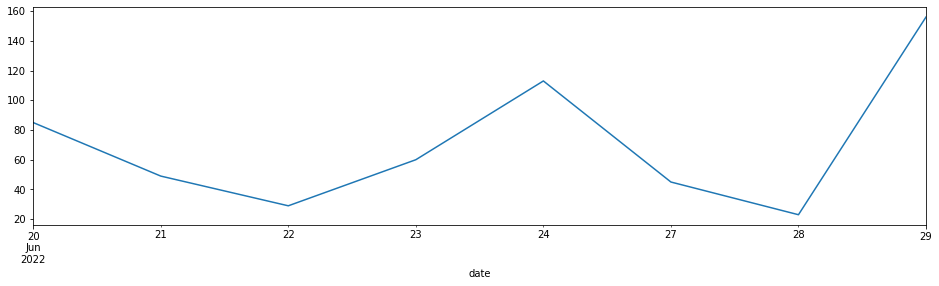

In [31]:
small_tweets_renamed['disgust'].resample('C').sum().plot(figsize=(16,4))

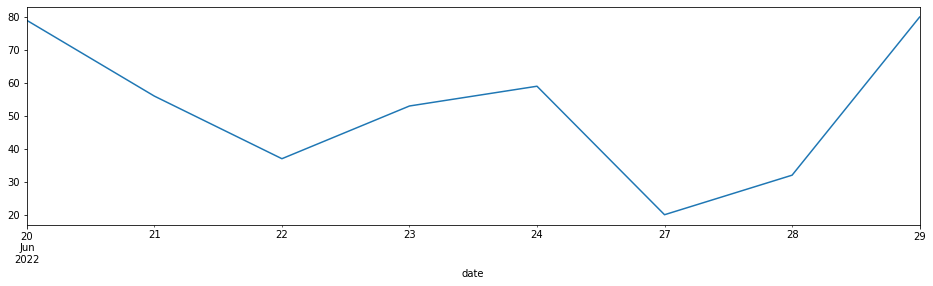

In [41]:
small_tweets_renamed['joy'].resample('C').sum().plot(figsize=(16,4))

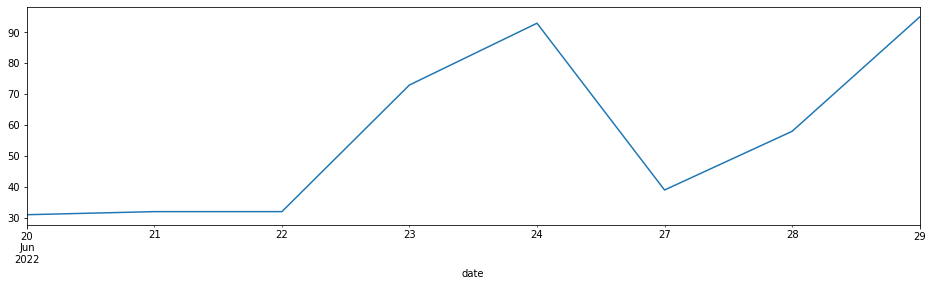

In [43]:
small_tweets_renamed['fear'].resample('C').sum().plot(figsize=(16,4))

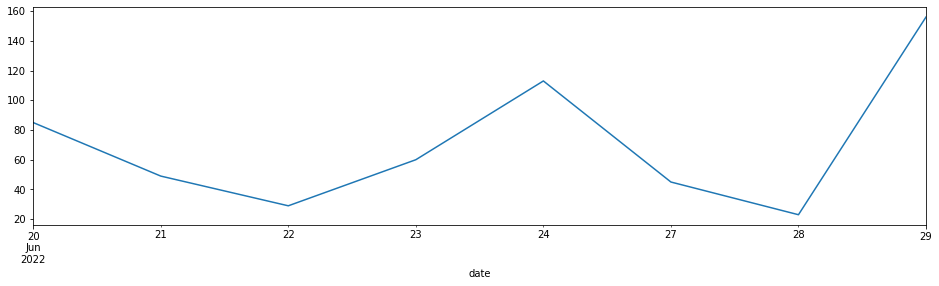

In [ ]:
small_tweets_renamed['disgust'].resample('C').sum().plot(figsize=(16,4))

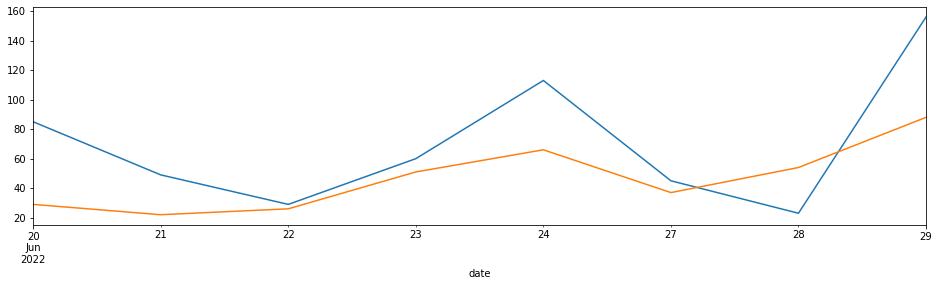

In [32]:
ax = small_tweets_renamed['disgust'].resample('C').sum().plot(figsize=(16,4))
small_tweets_renamed['anger'].resample('C').sum().plot(figsize=(16,4))


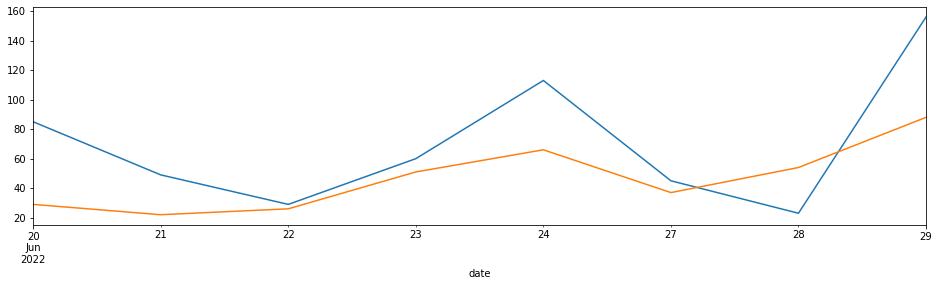

In [ ]:
ax = small_tweets_renamed['disgust'].resample('C').sum().plot(figsize=(16,4))
small_tweets_renamed['anger'].resample('C').sum().plot(figsize=(16,4))


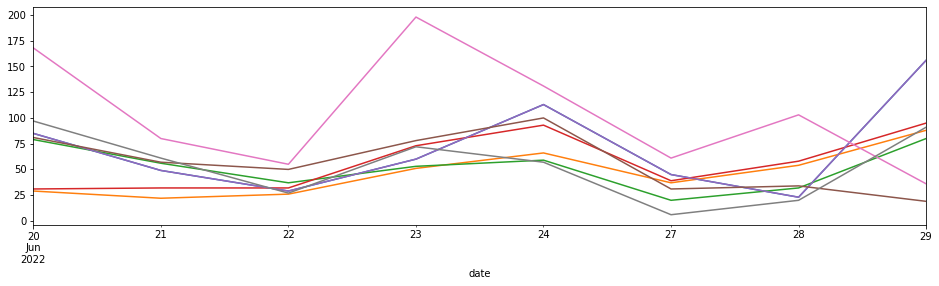

In [40]:
ax = small_tweets_renamed['disgust'].resample('C').sum().plot(figsize=(16,4) )
small_tweets_renamed['anger'].resample('C').sum().plot(figsize=(16,4))
small_tweets_renamed['joy'].resample('C').sum().plot(figsize=(16,4))
small_tweets_renamed['fear'].resample('C').sum().plot(figsize=(16,4))
small_tweets_renamed['disgust'].resample('C').sum().plot(figsize=(16,4))
small_tweets_renamed['anticipation'].resample('C').sum().plot(figsize=(16,4))
small_tweets_renamed['trust'].resample('C').sum().plot(figsize=(16,4))
small_tweets_renamed['surprise'].resample('C').sum().plot(figsize=(16,4))


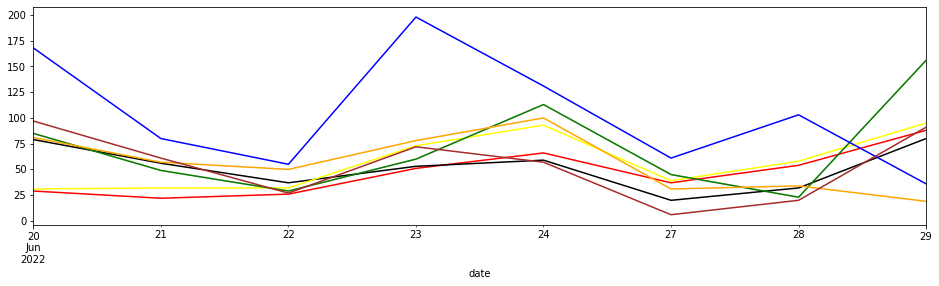

In [49]:
ax = small_tweets_renamed['disgust'].resample('C').sum().plot(figsize=(16,4), color = 'pink')
small_tweets_renamed['anger'].resample('C').sum().plot(figsize=(16,4), ax = ax, color = 'red')
small_tweets_renamed['joy'].resample('C').sum().plot(figsize=(16,4), ax = ax, color = 'black' )
small_tweets_renamed['fear'].resample('C').sum().plot(figsize=(16,4), ax = ax, color= 'yellow')
small_tweets_renamed['disgust'].resample('C').sum().plot(figsize=(16,4), ax = ax, color = 'green' )
small_tweets_renamed['anticipation'].resample('C').sum().plot(figsize=(16,4), ax = ax, color= 'orange')
small_tweets_renamed['trust'].resample('C').sum().plot(figsize=(16,4), ax = ax, color= 'blue')
small_tweets_renamed['surprise'].resample('C').sum().plot(figsize=(16,4), ax = ax, color= 'brown')
